<a href="https://colab.research.google.com/github/akkiyolo/pytorch/blob/main/Project(image_classification_using_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

## Dataset
### FashionMNIST

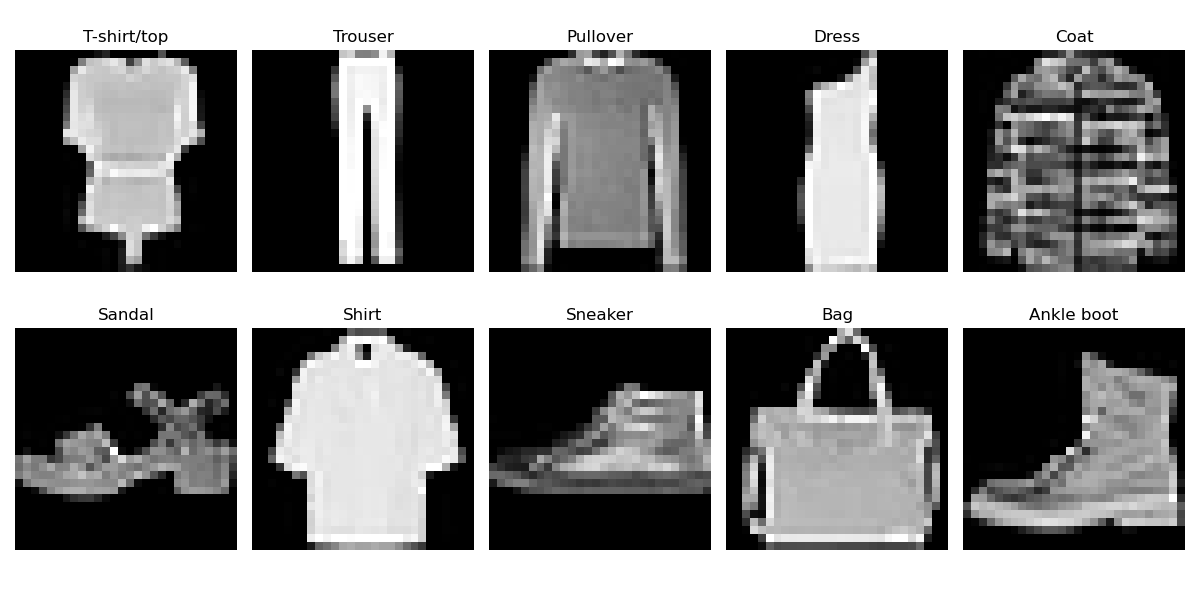


In [ ]:
train_dataset=datasets.FashionMNIST(root='/dataset',train=True,transform=transforms.ToTensor(),download=True)
train_dataset

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.38MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 134kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.51MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 2.55MB/s]


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset=datasets.FashionMNIST(root='/dataset',train=False,transform=transforms.ToTensor(),download=True)
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

### Dataset into batches

In [ ]:
batch_size=64

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
len(list(train_loader)) ## 60000/64=938

938

In [15]:
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
len(list(test_loader)) ## 10000/64=157

157

### Logistic Regression Model

In [17]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,in_dim,n_class):
        super().__init__()
        self.linear=nn.Linear(in_dim,n_class)

In [19]:
model=LogisticRegressionModel(784,10)
model

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)